### Librerias


In [1]:
# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# import pandas for importing csv files  
import pandas as pd  

import sklearn as sk

### Modelo

In [3]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv',delimiter= ',')

# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y que la columna 'rating' es tu variable objetivo

# X contiene las variables predictoras
X = df[['numVotes','Tipo','isAdult','startYear','endYear','runtimeMinutes','Genero','Directores','Escritores']]

# Y contiene la variable objetivo (rating)
Y = df['averageRating']

# Dividir el dataset en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos creados
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de Y_train:", Y_train.shape) 
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv',delimiter= ',')

# Supongamos que tienes un DataFrame llamado 'df' con tus datos
# y que la columna 'rating' es tu variable objetivo

# X contiene las variables predictoras
X = df[['numVotes','Tipo','isAdult','startYear','endYear','runtimeMinutes','Genero','Directores','Escritores']]

# Y contiene la variable objetivo (rating)
Y = df['averageRating']

# Dividir el dataset en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos creados
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de Y_train:", Y_train.shape)

Dimensiones de X_train: (782032, 9)
Dimensiones de X_test: (195509, 9)
Dimensiones de Y_train: (782032,)
Dimensiones de X_train: (782032, 9)
Dimensiones de X_test: (195509, 9)
Dimensiones de Y_train: (782032,)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=75, random_state=42)




In [8]:
rf_model.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=75, random_state=42)

In [9]:
# Realizar predicciones en el conjunto de prueba
Y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando el error cuadrático medio)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")







Error Cuadrático Medio (MSE): 1.106604434297487
Raíz del Error Cuadrático Medio (RMSE): 1.0519526768336525


In [10]:
from sklearn.metrics import r2_score

# Realizar predicciones en el conjunto de prueba
Y_pred = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando R^2
r2 = r2_score(Y_test, Y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.4394491819644928


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (10).

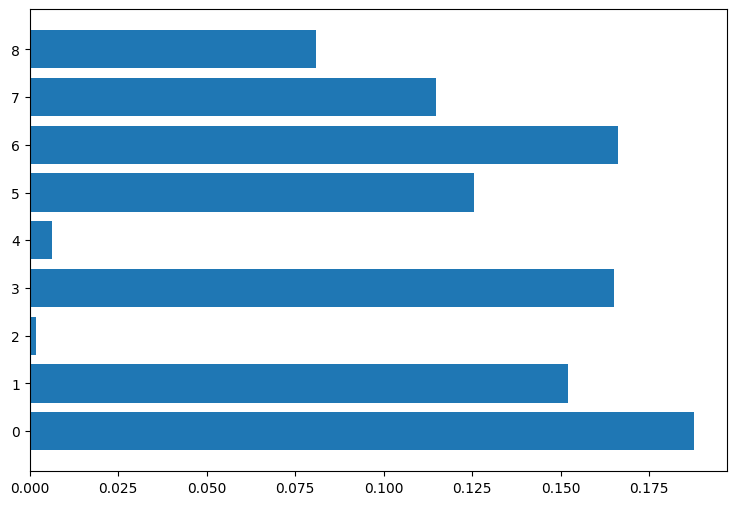

In [13]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características desde el modelo
feature_importances = rf_model.feature_importances_

# Obtener nombres de las características (si están disponibles)
feature_names = df.columns  # Reemplaza esto con el nombre real de tus características

# Crear un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(9, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Importancia de las Características')
plt.title('Importancia de las Características en el Modelo de Random Forest')
plt.show()

In [14]:
%pip install joblib


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(rf_model, 'random_forest_model.pkl')

OSError: [Errno 28] No space left on device